In [10]:
import matplotlib.pyplot as plt
import data
import utils

In [16]:
import ncvis
ds = data.MNIST()
# ds = data.PenDigits()
# ds = data.COIL20()
# ds = data.COIL100()
# ds = data.ScRNA()
# ds = data.Shuttle()

vis = ncvis.NCVis(n_init_epochs=20, n_epochs=50, min_dist=0.05)

In [17]:
%%time
Y = vis.fit(ds.X)

CPU times: user 3min 40s, sys: 562 ms, total: 3min 41s
Wall time: 18.7 s


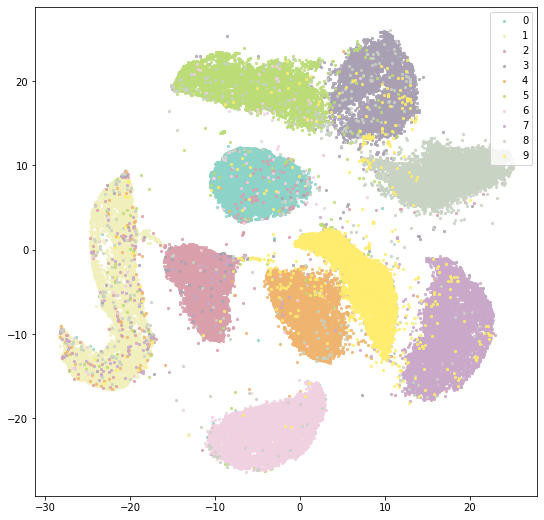

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
utils.scatter_classes(Y, ds.y, ax, marker='.', s=20, alpha=0.8)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cytoflow as flow

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [2]:
flow.

<module 'cytoflow' from '/home/alartum/.local/lib/python3.7/site-packages/cytoflow/__init__.py'>